In [13]:
# Claudio Iturra, 2025.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
import glob
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

from scipy import signal, ndimage
from scipy import fft as spfft
from scipy.fft import fft
import time

In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.5 MB/s eta 0:00:00


In [5]:
cd /content/drive/MyDrive/dropbox_server/research_database/remote/mercator/chile/2024

/content/drive/MyDrive/dropbox_server/research_database/remote/mercator/chile/2024


In [7]:
nc_files = glob.glob("cmems_mod_glo_phy_anfc_0.083deg_PT1H-m*.nc")
ds = xr.open_mfdataset(nc_files, combine='by_coords')

In [18]:
!pip install multitaper
!pip install spectrum
from multitaper import MTSpec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 kB 30.8 MB/s eta 0:00:00
  Created wheel for spectrum: filename=spectrum-0.9.0-cp312-cp312-linux_x86_64.whl size=236767 sha256=9aff49af0e5c15cf2e2abeee5924970c1516b15a4d5cb5e52bd9f706cbbda806
  Stored in directory: /root/.cache/pip/wheels/19/a0/e0/e04656d89dd723adbe6ea41ab5fe702f5d4ccf95653eb54b04
Successfully built spectrum


In [9]:
lonz = [
-71.177653791328197,
-70.791924990329804,
-70.685150518884299,
-70.737401113210694,
-70.9597164385345,
-71.134418789530798,
-71.514820345619498,
-71.971434262285101,
-72.113558548046896,
-72.076116200242296,
-72.094079325261404,
-72.348634110154606,
-72.859354620603199,
-73.404510581256005,
-73.826756878327899,
-73.962365615990194,
-74.077496110334096,
-74.067415737309602,
-73.989222481057297,
-74.090188277440802,
-74.236516458766502,
-74.365538034134602,
-74.670308160475301,
-74.674460040772004,
-74.6720783327915,
-74.779107555190507,
-74.964076880347903,
-75.080032449979299,
-75.260124426034196,
-75.304209779955102,
-75.159739129974994,
-75.890951147045001,
-76.057530345494698,
-75.924540513162498,
-75.606997083033207,
-75.129321274508001,
-74.207456022141599,
-73.059666946411099,
-71.353655237317696,
-68.986822172941103
]

In [10]:
latz = [
-18.810678167335102,
-19.891140092917599,
-20.975208486143401,
-22.2331324804139,
-24.215608447367298,
-25.937220691265299,
-27.717197931745201,
-29.526017427591501,
-30.960447659889802,
-31.688467635049001,
-32.759009446956497,
-33.7288164568509,
-35.007158848764099,
-36.198161756924499,
-36.818762763460903,
-37.097436960319598,
-37.631470148013797,
-38.334513088872697,
-39.040093468735698,
-39.655598758098201,
-40.229036360218998,
-40.8753151329947,
-41.8582056622054,
-42.373719436018199,
-42.834007874410801,
-43.387049719424397,
-44.158862284763799,
-44.575126109814597,
-45.491438798487998,
-45.860758430342798,
-47.2857242863887,
-48.432045946779198,
-49.549436425112702,
-50.626314630577298,
-52.034201241531697,
-52.815753463738197,
-53.979981715661502,
-54.771468418395898,
-55.395828094971897,
-56.464299846520397
]

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


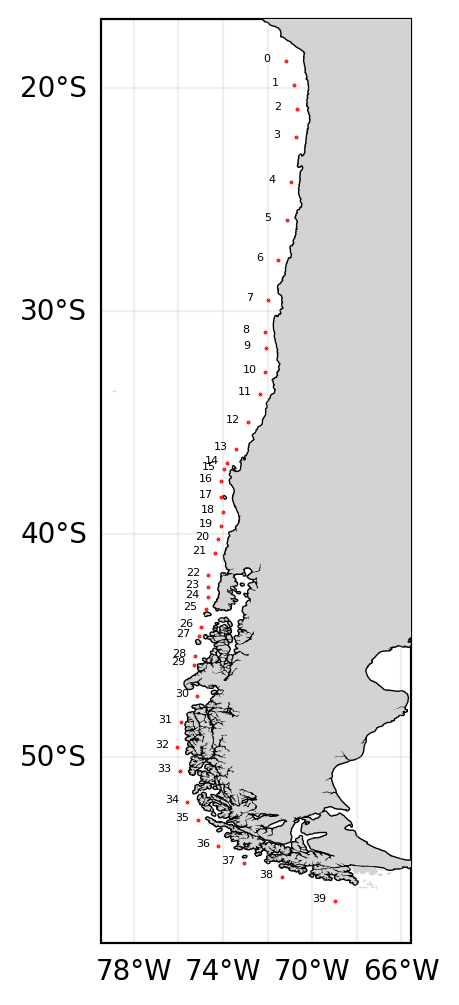

In [11]:
from matplotlib import pyplot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
pyplot.rcParams['figure.dpi'] = 200

lat_min, lat_max = -37.5, -35.5
lon_min, lon_max = -74, -72.3

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(2,6))

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.coastlines(resolution="10m", color="black", linewidth=1)
ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=5)
gl = ax.gridlines(draw_labels=True, linestyle="-", alpha=0.2)
gl.top_labels = False
gl.right_labels = False

plt.plot(lonz,latz, color = 'r', linestyle = 'none', marker = '.', markersize = 0.8)
plt.axis('equal')
plt.grid()

for i in range(0,len(lonz)):
  plt.text(lonz[i]-1,latz[i],i, fontsize = 4)


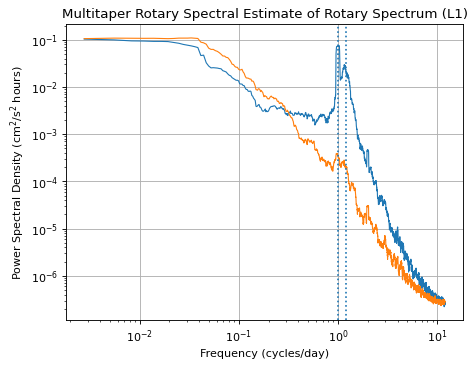

In [14]:
pyplot.rcParams['figure.dpi'] = 80
l1 = ds.sel(latitude=-36.4075, longitude=-73.1224, method='nearest')

dt = (1)/24
cv = l1['uo'].values.flatten() +1j*l1['vo'].values.flatten()
P = 16
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
S = np.ravel(spec.spec)
f = np.ravel(spec.freq)
plt.loglog( f[f>0],S[f>0], linewidth = 1)#plot positive side
plt.loglog(-f[f<0],S[f<0], linewidth = 1)#plot negative side
plt.axvline(24/24, linestyle = ':')
plt.axvline(24/20, linestyle = ':')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Power Spectral Density (cm$^2$/s$^2$ hours)')
plt.title('Multitaper Rotary Spectral Estimate of Rotary Spectrum (L1)')
plt.grid()
del cv, P, spec, S, f, dt

(1e-08, 1.0)

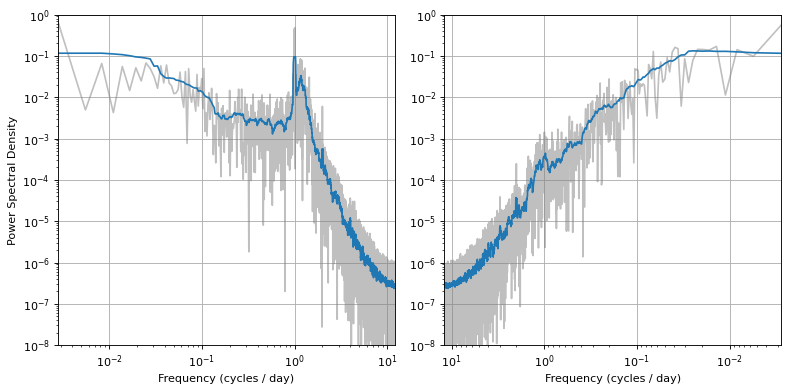

In [20]:

import spectrum
plt.figure(figsize=(10,5))
dt = 1/24

cv = l1['uo'].values.flatten() +1j*l1['vo'].values.flatten()
cv_centered = cv - np.mean(cv)
f, p = signal.periodogram(cv_centered, fs=1/dt, return_onesided=False, axis=0)
plt.subplot(1,2,1)
plt.loglog(f[f >= 0], p[np.where(f >= 0)], color = 'gray', alpha = 0.5)
plt.subplot(1,2,2)
plt.loglog(np.abs(f[f < 0]), p[np.where(f < 0)], color = 'gray', alpha = 0.5)


cv = l1['uo'].values.flatten() +1j*l1['vo'].values.flatten()
cv_centered = cv - np.mean(cv)
f, p = signal.periodogram(cv_centered, fs=1/dt, return_onesided=False, axis=0)
NW = 12
Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cv_centered, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cv_centered))
Sk = np.abs(Sk_complex)**2
Sk = Sk.T
p = np.mean(Sk*eigenvalues, axis=1) * dt
plt.subplot(1,2,1)
plt.loglog(f[f >= 0], p[np.where(f >= 0)])
plt.autoscale(enable=True, tight=True)
plt.tight_layout(), plt.grid()
plt.xlabel("Frequency (cycles / day)")
plt.ylabel("Power Spectral Density")
plt.ylim([10e-9,10e-1])

plt.subplot(1,2,2)
plt.loglog(np.abs(f[f < 0]), p[np.where(f < 0)])
plt.autoscale(enable=True, tight=True)
plt.tight_layout(), plt.grid()
plt.xlabel("Frequency (cycles / day)")
plt.gca().invert_xaxis()
plt.ylim([10e-9,10e-1])